<a href="https://colab.research.google.com/github/sabaagizew/-A-B-testing-analysis/blob/main/AB_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [29]:
import math as mt
import numpy as np
import pandas as pd
from scipy.stats import norm

In [30]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [31]:
# Packages imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

%matplotlib inline

# Some plot styling preferences
plt.style.use('seaborn-whitegrid')
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 14}

mpl.rc('font', **font)
effect_size = sms.proportion_effectsize(0.13, 0.15)    # Calculating effect size based on our expected rates

required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )                                                  # Calculating sample size needed

required_n = ceil(required_n)                          # Rounding up to next whole number                          

print(required_n)

4720


In [32]:
pd.set_option('max_column', None)
df= pd.read_csv('drive/MyDrive/AdSmartABdata.csv')


In [33]:
#Exploration on data

In [34]:
df.head(5)


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [36]:
df.shape

(8077, 9)

In [37]:
df.isna().sum()
#number of records that has no value

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [38]:
# Calculate total number of cells in dataframe
totalCells = np.product(df.shape)

    # Count number of missing values per column
missingCount = df.isnull().sum()

    # Calculate total number of missing values
totalMissing = missingCount.sum()

    # Calculate percentage of missing values
print("The AdSmartABdata dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The AdSmartABdata dataset contains 0.0 % missing values.


In [39]:
for col in df.columns:
    print(col)

#print(df.columns)
# other way of listing the columns

auction_id
experiment
date
hour
device_make
platform_os
browser
yes
no


In [40]:
# To make sure all the control group are seeing the old page and viceversa

pd.crosstab(df['experiment'], df['browser'])

browser,Android,Chrome,Chrome Mobile,Chrome Mobile WebView,Chrome Mobile iOS,Edge Mobile,Facebook,Firefox Mobile,Mobile Safari,Mobile Safari UI/WKWebView,Opera Mini,Opera Mobile,Pinterest,Puffin,Samsung Internet
experiment,,,,,,,,,,,,,,,
control,1,1,2410,292,34,0,561,0,246,30,1,0,2,1,492
exposed,0,2,2144,1197,17,1,203,1,91,14,0,3,1,0,332


In [41]:
session_counts= df['auction_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()

print(f'There are {multi_users} users that appear multiple times in the dataset')

There are 0 users that appear multiple times in the dataset


In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


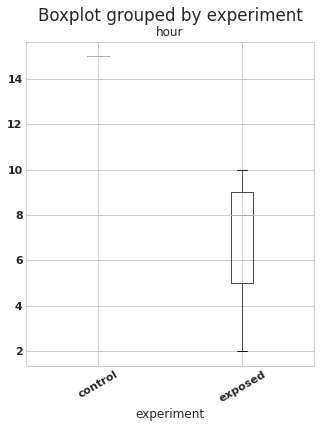

In [43]:
df.head().boxplot('hour','experiment',rot = 30,figsize=(5,6))


In [44]:
#users occurance in Ad on differnt hours

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


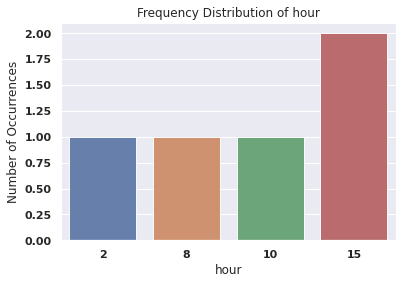

In [45]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
hour_count = df.head()['hour'].value_counts()
sns.set(style="darkgrid")
sns.barplot(hour_count.index, hour_count.values, alpha=0.9)
plt.title('Frequency Distribution of hour')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hour', fontsize=12)
plt.show()

In [46]:
# the classical p-value based algorithm

In [47]:
def pvalue_101(mu, sigma, samp_size, samp_mean=0, deltam=0):
    np.random.seed(1234)
    s1 = np.random.normal(mu, sigma, samp_size)
    if samp_mean > 0:
        print(len(s1[s1>samp_mean]))
        outliers = float(len(s1[s1>samp_mean])*100)/float(len(s1))
        print('Percentage of numbers larger than {} is {}%'.format(samp_mean, outliers))
    if deltam == 0:
        deltam = abs(mu-samp_mean)
    if deltam > 0 :
        outliers = (float(len(s1[s1>(mu+deltam)]))
                    +float(len(s1[s1<(mu-deltam)])))*100.0/float(len(s1))
        print('Percentage of numbers further than the population mean of {} by +/-{} is {}%'.format(mu, deltam, outliers))

    fig, ax = plt.subplots(figsize=(8,8))
    fig.suptitle('Normal Distribution: population_mean={}'.format(mu) )
    plt.hist(s1)
    plt.axvline(x=mu+deltam, color='red')
    plt.axvline(x=mu-deltam, color='green')
    plt.show()

35
Percentage of numbers larger than 183.0 is 0.35%
Percentage of numbers further than the population mean of 170.0 by +/-13.0 is 0.77%


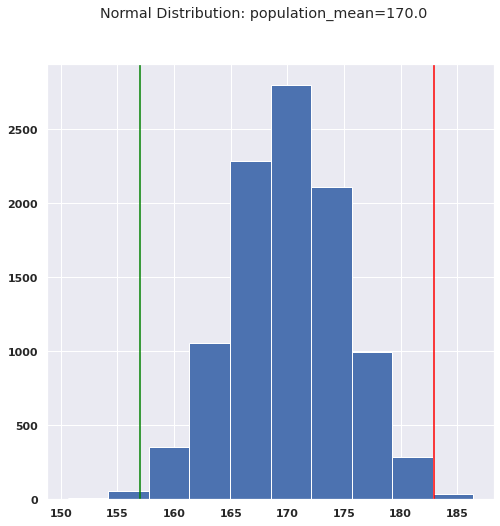

In [48]:
pvalue_101(170.0, 5.0, 10000, 183.0)

In [49]:
#A p-value of 0.35% will give the probability that we get a sample mean that is more than $183, given the hypothesis that the population mean is $170.
#A p-value of 0.77% will give the probability that we get a sample mean that is more than $183 or less than $157, given the hypothesis that the population mean is $170.

In [50]:
#the  sequential A/B testing algorithm 

In [51]:
from scipy import stats
def get_power(n, p1, p2, cl):
    alpha = 1 - cl
    qu = stats.norm.ppf(1 - alpha/2)
    diff = abs(p2-p1)
    bp = (p1+p2) / 2
    
    v1 = p1 * (1-p1)
    v2 = p2 * (1-p2)
    bv = bp * (1-bp)
    
    power_part_one = stats.norm.cdf((n**0.5 * diff - qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    power_part_two = 1 - stats.norm.cdf((n**0.5 * diff + qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    
    power = power_part_one + power_part_two
    
    return (power)

In [52]:
get_power(1000, 0.1, 0.12, 0.95)   #  0.29808032538146
get_power(2000, 0.1, 0.12, 0.95)   #  0.524515256115834
get_power(1000, 0.1, 0.12, 0.8)    #  0.5621010118690234

0.5621010118690234

In [53]:
#the smaller the Beta, the bigger the power.